url = 'https://raw.githubusercontent.com/rodmsmendes/reinforcementlearning4fun/master/data/house_prices.csv'
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# Set thedisplay options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

# Collect the data

In [2]:
df = pd.read_csv("/Users/ms/Desktop/house price /house_prices (1).csv")

df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna().copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalf

#  Preparing the data



The original dataset has 81 columns. Since I'm trying to use this dataset to show a simple example of machine learning in action I only need a few attributes to predict the SalePrice. 
So I select the following features and create a new dataframe out of it.

LotArea -  Lot size in square feet 

GrLivArea - Above grade (ground) living area square feet

YearBuilt - Original construction date

BedroomAbvGr - Number of bedrooms above basement level

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.




In [157]:
# Here I've only taken the features I want to use to predict the SalePrice.

df_select = df[["LotArea", "GrLivArea", "YearBuilt", "BedroomAbvGr", "SalePrice"]].rename(columns={"LotArea": "PropertySize", "GrLivArea": "LivingArea", "YearBuilt" : "YearBuilt", "BedroomAbvGr" : "Bedrooms", "SalePrice" : "Price"})


In [158]:
df_select.shape

(1460, 5)

In [159]:
#  Checked the data and there seems to be houses listed with 0 bedrooms. 
# I removed these listings to keep this simple.

df_select = df_select.loc[df_select['Bedrooms'] != 0]
df_select.shape

(1454, 5)

## Explore the dataset in Excel
### https://docs.google.com/spreadsheets/d/1P0EQ0RRf-hZMdgR_wA53Z4JSDD9sJBtpE015TQInaFM/edit?usp=sharing


#### Create an Area vs Price dataframe

In [160]:
# Save df_select as CSV to see values in excel. 

# df_select.to_csv("multivariate_LR.csv", index_label= False)

In [161]:
Area_Price = df_select[["LivingArea", "Price"]]
display(Area_Price.head())
display(Area_Price.shape)


LivingArea   Price
0        1710  208500
1        1262  181500
2        1786  223500
3        1717  140000
4        2198  250000

(1454, 2)

In [162]:
# Save as CSV to see values in excel. 

# Area_Price.to_csv("Area_Price.csv")

#### Create a Bedrooms vs Price dataframe

In [163]:
Bedrooms_Price = df_select[["Bedrooms", "Price"]]
display(Bedrooms_Price.head())
display(Bedrooms_Price.shape)

Bedrooms   Price
0         3  208500
1         3  181500
2         3  223500
3         3  140000
4         4  250000

(1454, 2)

In [164]:
# Save as CSV to see values in excel. 

# Bedrooms_Price.to_csv("Bedrooms_Price.csv")

In [165]:
# Check for null values
df_select.isnull().sum()

PropertySize    0
LivingArea      0
YearBuilt       0
Bedrooms        0
Price           0
dtype: int64

# Choose a ML Model: Linear Regression Machine Learning Model with Single Variable 

In [166]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PropertySize  1454 non-null   int64
 1   LivingArea    1454 non-null   int64
 2   YearBuilt     1454 non-null   int64
 3   Bedrooms      1454 non-null   int64
 4   Price         1454 non-null   int64
dtypes: int64(5)
memory usage: 68.2 KB


In [167]:
from sklearn.linear_model import LinearRegression


In [168]:
df_select.head()

PropertySize  LivingArea  YearBuilt  Bedrooms   Price
0          8450        1710       2003         3  208500
1          9600        1262       1976         3  181500
2         11250        1786       2001         3  223500
3          9550        1717       1915         3  140000
4         14260        2198       2000         4  250000

In [169]:
print(df_select.shape)


(1454, 5)


In [170]:
LivingArea = df_select["LivingArea"] 
Bedrooms = df_select["Bedrooms"]
Price = df_select["Price"] 

print(LivingArea.head())
print(type(LivingArea))


print(LivingArea.shape)
print(Bedrooms.shape)
print(Price.shape)



0    1710
1    1262
2    1786
3    1717
4    2198
Name: LivingArea, dtype: int64
<class 'pandas.core.series.Series'>
(1454,)
(1454,)
(1454,)


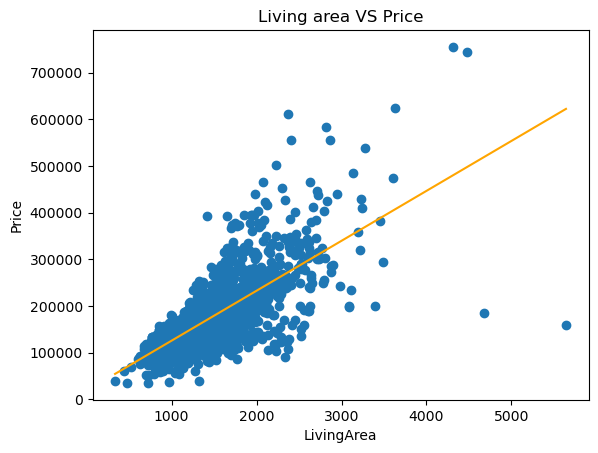

In [171]:
plt.title("Living area VS Price")
plt.xlabel('LivingArea')
plt.ylabel('Price')


plt.plot(np.unique(LivingArea), np.poly1d(np.polyfit(LivingArea, Price, 1))(np.unique(LivingArea)) , color='orange')

plt.scatter(LivingArea, Price)

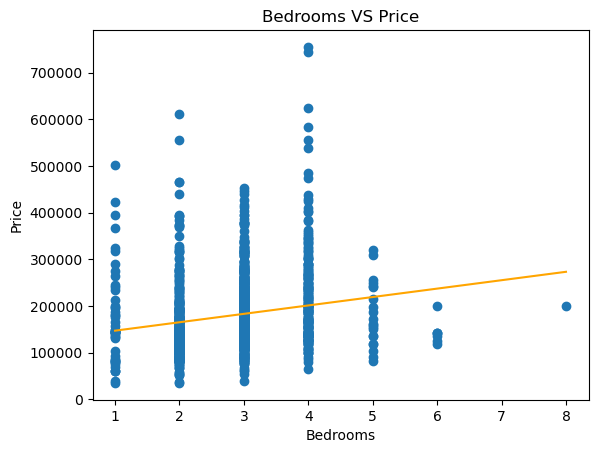

In [172]:
plt.title("Bedrooms VS Price")
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.plot(np.unique(Bedrooms), np.poly1d(np.polyfit(Bedrooms, Price, 1))(np.unique(Bedrooms)), color='orange')

plt.scatter(Bedrooms, Price)

In [173]:
print(LivingArea.shape)
print(Bedrooms.shape)
print(Price.shape)

(1454,)
(1454,)
(1454,)


In [174]:
# Reshape the dfs to have value for the column instead of a null.

LivingArea = LivingArea.values.reshape(-1, 1)
Bedrooms = Bedrooms.values.reshape(-1, 1)
Price = Price.values.reshape(-1, 1)

print(LivingArea.shape)
print(Bedrooms.shape)
print(Price.shape)


(1454, 1)
(1454, 1)
(1454, 1)


# Train the model

In [175]:
from sklearn.model_selection import train_test_split


## Predict price based on size of house.

In [176]:
LivingArea_train, LivingArea_test, Price_train, Price_test = train_test_split(LivingArea, Price, test_size=0.2, random_state=42)

x_train, X_test, y_train, Y_test

In [177]:
display(LivingArea_train)

array([[1470],
       [1728],
       [ 974],
       ...,
       [1983],
       [1148],
       [ 936]])

In [178]:

Price_train

array([[135000],
       [207500],
       [ 93500],
       ...,
       [225000],
       [132500],
       [140000]])

In [179]:
from sklearn import linear_model


In [180]:

# Train the model 

reg_area = linear_model.LinearRegression()
reg_area.fit(LivingArea_train, Price_train)


LinearRegression()

# Evaluate the model

In [181]:
# Predict values using test data.
reg_area_score = (reg_area.score(LivingArea_test, Price_test) * 100).round(2)
print("The accuracy of the ML model based on Living Area is:", reg_area_score , "%")


The accuracy of the ML model based on Living Area is: 53.37 %


## Deploy the model however you have to or want to.

In [182]:
# Enter sqft area of the house you want to predict the price for. 

LivingArea_Pred = -1300

pred_1 = reg_area.predict([[LivingArea_Pred]]) 

print(f"A {LivingArea_Pred} sqft house may cost: {pred_1} and is {reg_area_score}% accurate" )



A -1300 sqft house may cost: [[-119718.35984202]] and is 53.37% accurate


## Predict price based on number of bedrooms.

In [183]:
Bedrooms_train, Bedrooms_test, Price_train, Price_test = train_test_split(Bedrooms, Price, test_size=0.2, random_state=42)

In [184]:
reg_bed = linear_model.LinearRegression()
reg_bed.fit(Bedrooms_train, Price_train)

LinearRegression()

In [185]:
# Predict values using test data.
reg_bed_score = (reg_bed.score(Bedrooms_test, Price_test) * 100).round(2)
print(f"The accuracy of the ML model based on number of Bedrooms is: {reg_bed_score}%")


The accuracy of the ML model based on number of Bedrooms is: 0.21%


In [186]:
# Enter number of bedrooms of the house you want to predict the price for. 

Bedroom_Pred = 1

pred_2 = reg_bed.predict([[Bedroom_Pred]]) 

print("A house with", Bedroom_Pred, "bedroom(s) may cost:", * pred_2)

A house with 1 bedroom(s) may cost: [151605.81520581]


# Next steps: 
## Tune and iteratively improve the model
## Deploy the model

In [187]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # # Using SVC method of svm class to use Support Vector Machine Algorithm
  # from sklearn.svm import SVC
  # svc_lin = SVC(kernel = 'linear', random_state = 0)
  # svc_lin.fit(X_train, Y_train)

  # #Using SVC method of svm class to use Kernel SVM Algorithm
  # from sklearn.svm import SVC
  # svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  # svc_rbf.fit(X_train, Y_train)

  # #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  # from sklearn.naive_bayes import GaussianNB
  # gauss = GaussianNB()
  # gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(LivingArea_test, Price_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(LivingArea_test, Price_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(LivingArea_test, Price_test))
  # print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(LivingArea_test, Price_test))
  # print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(LivingArea_test, Price_test))
  # print('Gaussian Naive Bayes Training Accuracy:', gauss.score(LivingArea_test, Price_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(LivingArea_test, Price_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(LivingArea_test, Price_test))*100)
  
  # return log, tree, forest

In [188]:
models(LivingArea_train, Price_train)

/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elysium/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Logistic Regression Training Accuracy: 1.3745704467353952
Linear Regression Training Accuracy: 53.36654043743587
K Nearest Neighbor Training Accuracy: 0.013745704467353952
Decision Tree Classifier Training Accuracy: 0.6872852233676976
Random Forest Classifier Training Accuracy: 0.3436426116838488
